# Unsupervised Learning Tutorial of Gianni Franchi
**PLEASE write your name and first name here:**
Yu WANG

Welcome to my new Unsupervised learning tutorial!
**In this notebook, you will**:
- Learn to implement a Principal Component Analysis on synthetic data
- Learn to use the Principal Component Analysis on real data
- Learn to implement an Autoencoder Convolutional Neural Network.
- Learn to perform K-means

If you have never used jupyter notebooks, nor Colab notebooks, [here](https://colab.research.google.com/notebooks/welcome.ipynb) is a short intro.


## I. Principal Component Analysis (PCA)

We will briefly go through the basics of the PCA, playing with toy examples.

## II. Autoencoder Convolutional Neural Network

In this part, we will train an Autoencoder Deep Neural Network to perform dimensionality reduction

## III. Clustering

You will perform clustering 



# I. Principal Component Analysis (PCA)

Principal component analysis is a fast and flexible unsupervised method for dimensionality reduction in data.

*   First let us build a start by writing the PCA for synthetic data
*   Then we apply the fast PCA from sklearn.
*   Then we apply it on real data.

## A. PCA on synthetic data
First let us build two datasets.

In [1]:
from mpl_toolkits import mplot3d

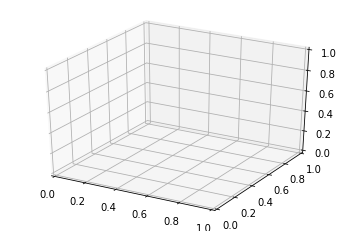

In [2]:
%matplotlib inline
#import scprep
import numpy as np
import pandas as pd
import sklearn.preprocessing
import sklearn.datasets
import matplotlib.pyplot as plt
import matplotlib.cm as cm
fig = plt.figure()
ax = plt.axes(projection='3d')

(400, 3)


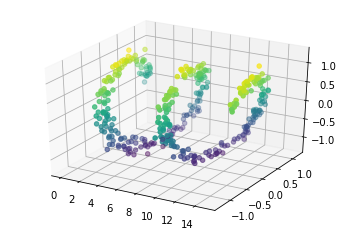

In [5]:
ax = plt.axes(projection='3d')

'''# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')'''

# Data for three-dimensional scattered points
xdata = 15 * np.random.random(400)
zdata = np.sin(xdata) + 0.1 * np.random.randn(400)
ydata = np.cos(xdata) + 0.1 * np.random.randn(400)
X1=np.concatenate(( np.expand_dims(xdata,1),np.expand_dims(ydata,1), np.expand_dims(zdata,1)), axis=1)
print(np.shape(X1))
ax.scatter3D(xdata, ydata, zdata, c=zdata)

(400, 3)


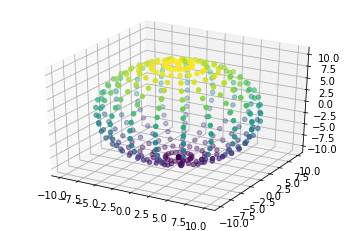

In [6]:
ax = plt.axes(projection='3d')

u = np.linspace(0, 2 * np.pi, 20)
v = np.linspace(0, np.pi, 20)

xdata = 10 * np.outer(np.cos(u), np.sin(v))
ydata = 10 * np.outer(np.sin(u), np.sin(v))
zdata = 10 * np.outer(np.ones(np.size(u)), np.cos(v))

xdata=np.reshape(xdata, (400))
ydata=np.reshape(ydata, (400))
zdata=np.reshape(zdata, (400))
X2=np.concatenate(( np.expand_dims(xdata,1),np.expand_dims(ydata,1), np.expand_dims(zdata,1)), axis=1)
print(np.shape(X2))
ax.scatter3D(xdata, ydata, zdata, c=zdata)#, cmap='Greens');

**Q/please write the complete the code to perform the PCA**

(3, 3)


Text(0, 0.5, 'Explained Variance')

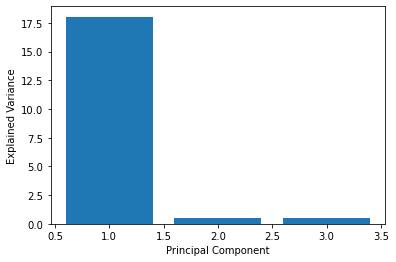

In [7]:
# 0/ choose one of the two dataset
data=X1
# 1/ compute the sample covariance matrix
Sigma = np.cov(np.transpose(data))
print(np.shape(Sigma))
# 2/ compute the eigen decomposition of Sigma
eigenvalues, eigenvectors = np.linalg.eigh(Sigma)
# 3/ sort the eigenvectors in order of decreasing eigenvalue
order = np.argsort(eigenvalues)[::-1]
eigenvalues, eigenvectors = eigenvalues[order], eigenvectors[:,order]

# plot the eigenvalues
plt.bar(np.arange(len(eigenvalues))+1, eigenvalues)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')

**Q/How many principal components do you think are meaningful in this dataset?**

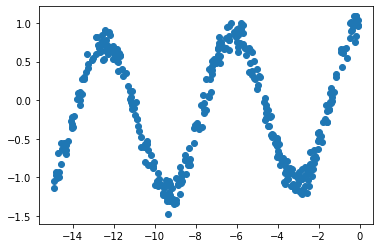

In [8]:
# =============
# 
n = 2
# =============
ax = plt.axes()
# take only the first n eigenvectors and eigenvalues
eigenvectors, eigenvalues = eigenvectors[:,:n], eigenvalues[:n]

# project the data onto the principal directions by matrix multiplication
data_pca = data @ eigenvectors
xdata_pca, ydata_pca= data_pca[:,0],  data_pca[:,1]
ax.scatter(xdata_pca, ydata_pca)

## B. PCA on Real data
**\Q your next task will be to visualise MNIST dataset in a 2D**

The MNIST database is a database of handwritten digits that is commonly used for training machine learning algorithms. It is composed of 60k 28x28 training images and 10k 28x28 testing images.  The dataset is composed of 10 classes, which are the digits from 0 to 9.

In [15]:
# First we load the dataset
#  to make it more consistent with the auto encode we take MNIST from PyTorch Library
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn import decomposition
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import ReduceLROnPlateau,StepLR

transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
        ])
datasetMnist = datasets.MNIST('../data', train=True, download=True,transform=transform)

In [19]:
# we are going to use numpy and sklearn function so we nead to transform the dataset into a ndarray object.
# Check now it is a tensor object.
print(type(datasetMnist.data))
numpyMnist_img = datasetMnist.data.numpy()
# let us check the shape of the dataset
print(np.shape(numpyMnist_img))
# Now we need to transform the dataset such each image is represented just by one vector
numpyMnist=np.reshape(numpyMnist_img,(60000,28*28))
print(np.shape(numpyMnist))
numpyMnist_target = datasetMnist.targets.numpy() # this vector contains all the classes


<class 'torch.Tensor'>
(60000, 28, 28)
(60000, 784)


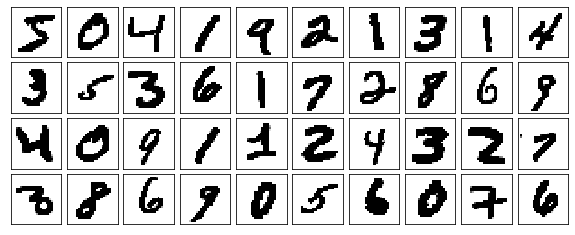

In [20]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(28, 28),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(numpyMnist_img)

**\Q Please use sklearn to Perform the PCA**
You can find a tuto [here](https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html#sphx-glr-auto-examples-decomposition-plot-pca-iris-py)

In [21]:
pca = decomposition.PCA(n_components=2)
pca.fit(numpyMnist)
numpyMnist_reduced = pca.transform(numpyMnist)

In [22]:
print(numpyMnist_reduced.shape)

(60000, 2)


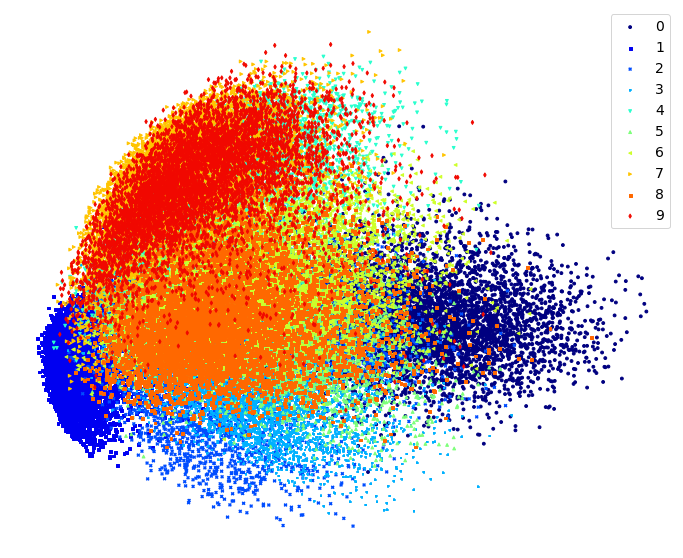

In [23]:
# please visualize the results
classes=[0,1,2,3,4,5,6,7,8,9]

fig = plt.figure(figsize=(12, 10))
plots = []
markers = ['o', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']  # select different markers
for i, c in enumerate(classes):
    ind = (numpyMnist_target == i)
    color = cm.jet([i / len(classes)] * sum(ind))
    # plot each category one at a time 
    plots.append(plt.scatter(numpyMnist_reduced[ind, 0], numpyMnist_reduced[ind, 1], c=color, marker=markers[i], s=8, label=i))

plt.axis('off')
#plt.xlim(-510, 510)
#plt.ylim(-510, 510)
plt.legend(plots, classes, fontsize=14, loc='upper right')
ax.set_title('(PCA: {}-dim -> 2-dim)'.format(784), fontsize=14)
plt.show()

**\Q Please use the PCA to denoise the image**

*To do that first apply a pca on the noised dataset and then apply an inverse PCA. Please use 30 principal components*


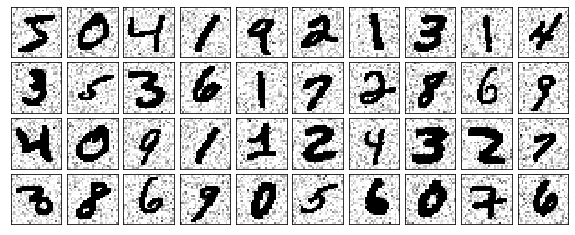

In [24]:
# first we add some noise

np.random.seed(42)
noisyMnist_img = np.random.normal(numpyMnist_img, 4)
plot_digits(noisyMnist_img)


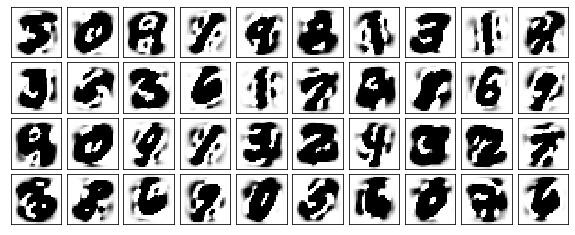

In [32]:
noisyMnist_img=np.reshape(noisyMnist_img,(60000,28*28))
pca = decomposition.PCA(n_components=30)
pca.fit(noisyMnist_img)
noisyMnist_img_reduced = pca.transform(noisyMnist_img)
filtered = pca.inverse_transform(noisyMnist_img_reduced)
filteredMnist_img=np.reshape(filtered,(60000,28*28))
plot_digits(filteredMnist_img)

# II. Auto encoder on Real data


We will
*  buid a dataset loader
*  build a CNN
*  buid a Training function
*  buid a Testing function



## A. Dataset loaders

In [33]:
# First we build the train and test loader
trainset = datasets.MNIST('../data', train=True, download=True,
                       transform=transform)
testset = datasets.MNIST('../data', train=False,
                       transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=120, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=50, shuffle=False, num_workers=2)
# thanks to these loaders we can be sure that the GPU will always have a batch to Process

## B. Building the DNN

In [34]:
class Net(nn.Module):
    def __init__(self,p=0.5,dim=3):
        super(Net, self).__init__()
        self.dropout2 = nn.Dropout(p)
        self.fc1 = nn.Linear(784, dim)
        self.fc2 = nn.Linear(dim, 784)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        return x
    def encoder(self, x):
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        return x

In [36]:
# We build the Network used for the training
dropout = 0.25
net = Net(dropout,2)
# net = net.cuda() # we put the parameters of the CNN into cuda


## C. Utility functions

In [45]:
lr=1e-2
reg_w_decay=1e-2
n_epochs = 10 
log_interval =200
optimizer = torch.optim.SGD(net.parameters(), lr=lr,weight_decay=reg_w_decay)
lr_scheduler =  StepLR(optimizer, step_size=10, gamma=0.1)
criterion = torch.nn.MSELoss()

In [46]:
# training script

def train( model, train_loader, optimizer, epoch,log_interval=50):
    model.train()
    loss_cpu=0
    for batch_idx, data in enumerate(train_loader, 0):

        # get the inputs; data is a list of [inputs, labels]
        inputs, target = data
        #inputs, target = inputs.cuda(), target.cuda()
        inputs = inputs.view(inputs.shape[0], -1)
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs,inputs)

        loss.backward()
        optimizer.step()
        loss_cpu+=loss.cpu().item()

        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(inputs), len(train_loader.dataset),
                       100. * batch_idx / len(train_loader), loss.item()))
            #n_iter=epoch * len(train_loader) + batch_idx

    return loss_cpu/len(train_loader)

In [47]:
# testing script
def test( model, test_loader,epoch):
    model.eval()

    loss =0
    with torch.no_grad():
        for batch_idx, data in enumerate(test_loader, 0):
            inputs, target = data
            #inputs, target = inputs.cuda(), target.cuda()
            inputs = inputs.view(inputs.shape[0], -1)
            outputs  = model(inputs)
            loss += criterion(outputs,inputs)

    test_loss_MSE = loss.item()/ len(test_loader)
    print('Test Epoch: {} \tMSE LOSS: {:.6f}'.format(epoch, test_loss_MSE))
    return test_loss_MSE 
 

In [48]:
# Colors from Colorbrewer Paired_12
colors = [[31, 120, 180], [51, 160, 44]]
colors = [(r / 255, g / 255, b / 255) for (r, g, b) in colors]

def plot_losses(train_history, val_history):
    x = np.arange(1, len(train_history) + 1)

    plt.figure(figsize=(8, 6))
    plt.plot(x, train_history, color=colors[0], label="Training loss", linewidth=2)
    plt.plot(x, val_history, color=colors[1], label="Validation loss", linewidth=2)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.title("Evolution of the training and validation loss")
    plt.show()

In [49]:
def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

## D. Training Process
**\Q You have everything now. Please write the training of the DNN**

In [50]:
print ("Let us Train.")

best_error = float('inf')
train_history = []
val_history = []
print('----------------------------------------------------------------------------------------------------')
print('3/ training model 1')
print('----------------------------------------------------------------------------------------------------')

iter =0
for epoch in range(n_epochs):
    loss = train(net, trainloader, optimizer, epoch,log_interval)
    train_history.append(loss)
    lr_scheduler.step()
    error= test(net, testloader,epoch)
    val_history.append(error)
    print('lr =',get_lr(optimizer))

    if error <best_error:
        best_error=error
        print('Best RMSE is of : ' + str(best_error), 'for epoch :', epoch,'ERROR TEST = ',error)


        #net_test.parameters()=net.state_dict()
        #net_best.load_state_dict(net.state_dict(), strict=True)

print ("Training Done!")

Let us Train.
----------------------------------------------------------------------------------------------------
3/ training model 1
----------------------------------------------------------------------------------------------------
Train Epoch: 0 [0/60000 (0%)]	Loss: 1.322930
Train Epoch: 0 [24000/60000 (40%)]	Loss: 1.167080
Train Epoch: 0 [48000/60000 (80%)]	Loss: 1.182978
Test Epoch: 0 	MSE LOSS: 1.171243
lr = 0.01
Best RMSE is of : 1.1712430572509767 for epoch : 0 ERROR TEST =  1.1712430572509767
Train Epoch: 1 [0/60000 (0%)]	Loss: 1.221447
Train Epoch: 1 [24000/60000 (40%)]	Loss: 1.148692
Train Epoch: 1 [48000/60000 (80%)]	Loss: 1.132264
Test Epoch: 1 	MSE LOSS: 1.145543
lr = 0.01
Best RMSE is of : 1.145543441772461 for epoch : 1 ERROR TEST =  1.145543441772461
Train Epoch: 2 [0/60000 (0%)]	Loss: 1.135833
Train Epoch: 2 [24000/60000 (40%)]	Loss: 1.080095
Train Epoch: 2 [48000/60000 (80%)]	Loss: 1.076294
Test Epoch: 2 	MSE LOSS: 1.122611
lr = 0.01
Best RMSE is of : 1.12261093139

**\Q  Please draw the training / validation loss**

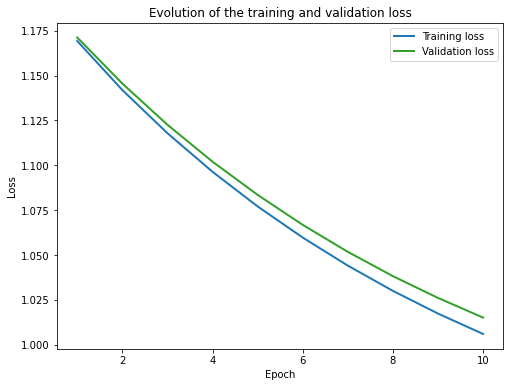

In [51]:
plot_losses(train_history,val_history)

**\Q Please reduce the dimension of the test set and vizualise it**

In [53]:
# encoder script
def encoder_data( model, test_loader,epoch):
    model.eval()

    test_loss_MSE =0
    with torch.no_grad():
        for batch_idx, data in enumerate(test_loader, 0):
            inputs, target = data
            #inputs, target = inputs.cuda(), target.cuda()
            outputs  = model.encoder(inputs)

            if batch_idx ==0:
              output_concat = outputs.clone()

     
            else:
              output_concat=torch.cat((output_concat, outputs), 0)


    return  output_concat

In [54]:
numpyMnist_reduced_autoencoder= encoder_data(net, testloader,epoch)
numpyMnist_reduced_autoencoder=numpyMnist_reduced_autoencoder.cpu().numpy()
numpyMnist_target_test = testset.targets.numpy() # this vector contains all the classes

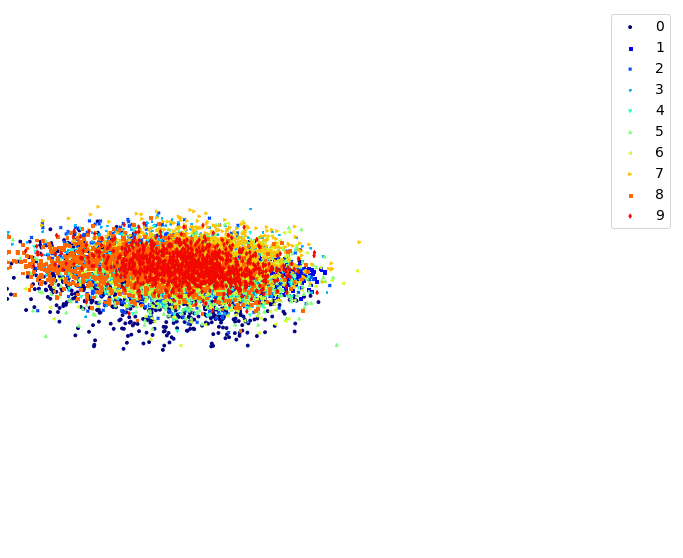

In [57]:
# please visualize the results
classes=[0,1,2,3,4,5,6,7,8,9]

fig = plt.figure(figsize=(12, 10))
plots = []
markers = ['o', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']  # select different markers
for i, c in enumerate(classes):
    ind = (numpyMnist_target_test == i)
    color = cm.jet([i / len(classes)] * sum(ind))
    # plot each category one at a time 
    plots.append(plt.scatter(numpyMnist_reduced_autoencoder[ind, 0], numpyMnist_reduced_autoencoder[ind, 1], c=color, marker=markers[i], s=8, label=i))

plt.axis('off')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.legend(plots, classes, fontsize=14, loc='upper right')
ax.set_title('(PCA: {}-dim -> 2-dim)'.format(784), fontsize=14)
plt.show()

# III. Clustering with K-means


## A. Kmeans on Synthetic data

The k-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset. It accomplishes this using a simple conception of what the optimal clustering looks like:

    The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
    Each point is closer to its own cluster center than to other cluster centers.

Those two assumptions are the basis of the k-means model. We will soon dive into exactly how the algorithm reaches this solution, but for now let's take a look at a simple dataset and see the k-means result.

First, let's generate a two-dimensional dataset containing four distinct blobs. To emphasize that this is an unsupervised algorithm, we will leave the labels out of the visualization


/Users/wangyu980312/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


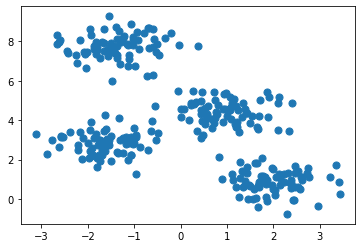

In [58]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

By eye, it is relatively easy to pick out the four clusters. The k-means algorithm does this automatically, and in Scikit-Learn uses the typical estimator API:

In [72]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

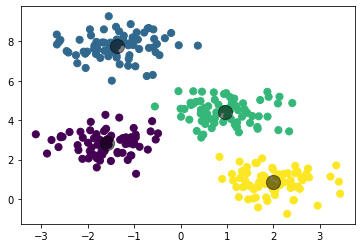

In [73]:
# now let us visualize the results
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

## B. Kmeans on real data
**Q/ please apply the Kmeans on the Mnist data**


In [74]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(numpyMnist)
kmeans.cluster_centers_.shape

(10, 784)

**Q/ please plot the cluster centers**

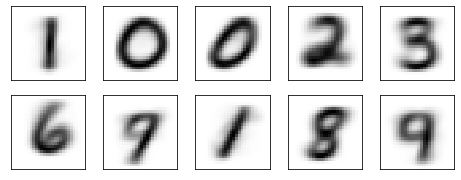

In [75]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 28, 28)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

We see that even without the labels, KMeans is able to find clusters whose centers are recognizable digits, with perhaps the exception of 1 and 8.

Because k-means knows nothing about the cluster's identity, there are several strategies to evaluate the clusters. What we are going to do is fix for each cluster one label. To do that, we check which is the dominant label, and we use this one.


**Q/ please evaluate the results of K-means**

In [77]:
from scipy.stats import mode

labels_predicted = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels_predicted[mask] = mode(numpyMnist_target[mask])[0]

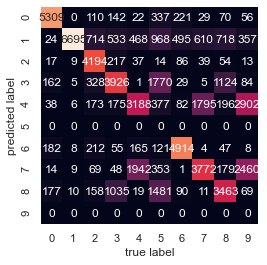

In [79]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()  # for plot styling
accuracy_score(numpyMnist_target, labels_predicted)
classes=['0','1','2','3','4','5','6','7','8','9']
mat = confusion_matrix(numpyMnist_target, labels_predicted)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=classes,
            yticklabels=classes)
plt.xlabel('true label')
plt.ylabel('predicted label');

## C. Kmeans on a real image
**Q/ please apply the Kmeans on the image to build clusters**


**use k=10 clusters**

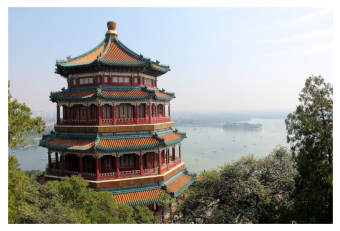

In [80]:
# Note: this requires the ``pillow`` package to be installed
from sklearn.datasets import load_sample_image
img = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(img);

In [82]:
print(np.shape(img))
# we reshape the img to apply the kmeans
data = img / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3)
data.shape

(427, 640, 3)


(273280, 3)

In [94]:
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(data)

In [95]:
kmeans.cluster_centers_.shape

(3, 3)

In [96]:
print(np.shape(clusters))
clusters=np.reshape(clusters,(427,640))

(273280,)


Text(0.5, 1.0, 'Segmented')

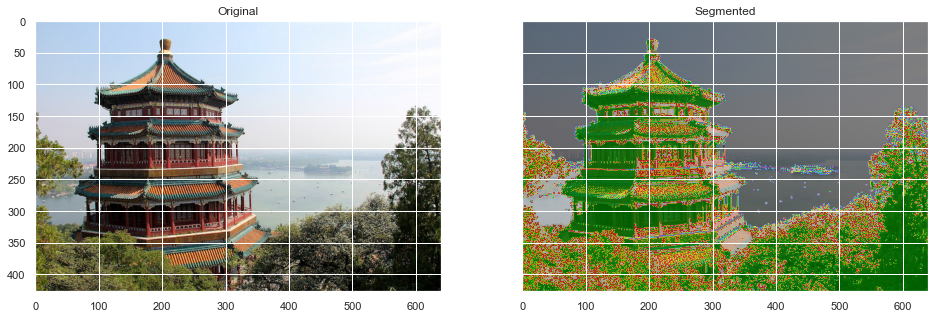

In [97]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 16),
                         sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(img, cmap=plt.cm.gray)
ax[0].set_title("Original")

ax[1].imshow(img, cmap=plt.cm.gray)
ax[1].imshow(clusters, cmap=plt.cm.nipy_spectral, alpha=.5)
ax[1].set_title("Segmented")